正在从文件 '../results2048/checkpoint-55200/trainer_state.json' 读取训练历史...
数据提取成功，正在绘制图表...


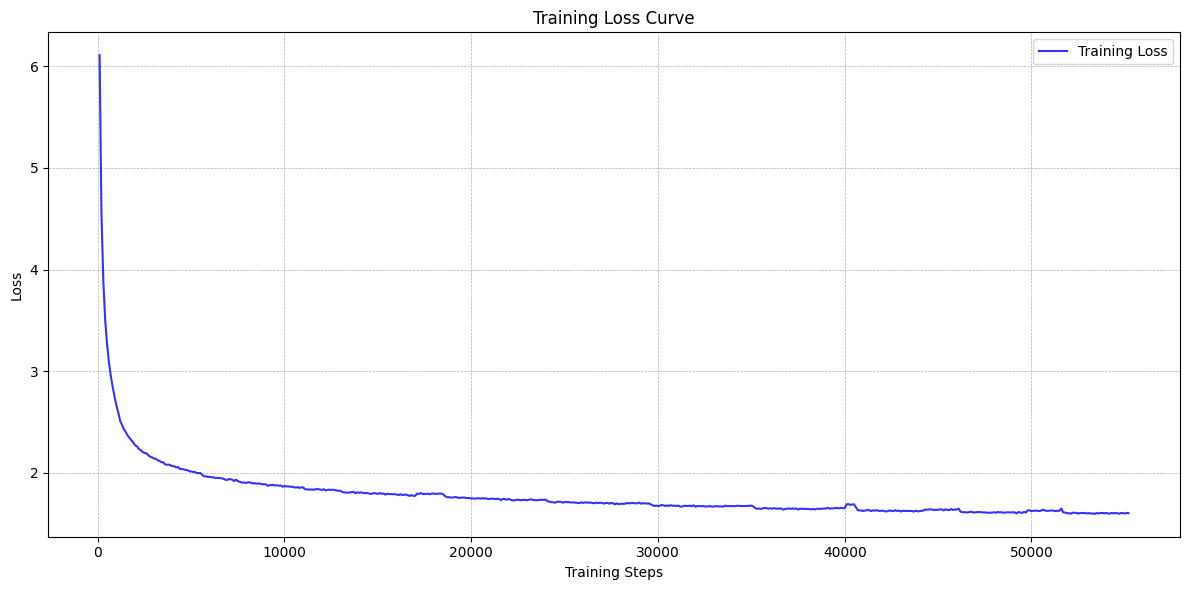

In [2]:
import json
import matplotlib.pyplot as plt

# --- 用于可视化训练损失的代码 ---

# 1. 定义包含训练状态的 JSON 文件路径
#    这个文件位于您的一个存档点文件夹内。
#    我们选择最新的存档点，因为它包含了最完整的训练历史。
#    请根据您的实际文件夹名称修改此路径。
checkpoint_path = "../results2048/checkpoint-55200"  # 使用您图片中显示的最新存档点
trainer_state_path = f"{checkpoint_path}/trainer_state.json"

print(f"正在从文件 '{trainer_state_path}' 读取训练历史...")

try:
    # 2. 读取并解析 JSON 文件
    with open(trainer_state_path, 'r') as f:
        data = json.load(f)

    # 3. 提取损失历史记录
    #    'log_history' 是一个列表，包含了每一步的日志信息
    log_history = data['log_history']

    # 4. 准备用于绘图的数据
    steps = []
    losses = []
    for log in log_history:
        # 我们只关心包含 'loss' 键的训练日志，忽略评估日志
        if 'loss' in log:
            steps.append(log['step'])
            losses.append(log['loss'])
    
    if not steps:
        print("错误：在日志历史中没有找到任何训练损失记录。")
    else:
        print("数据提取成功，正在绘制图表...")
        # 5. 使用 Matplotlib 绘制图表
        plt.figure(figsize=(12, 6))  # 创建一个大一点的图布
        plt.plot(steps, losses, label='Training Loss', color='blue', alpha=0.8)
        
        # 添加图表标题和坐标轴标签
        plt.title('Training Loss Curve')
        plt.xlabel('Training Steps')
        plt.ylabel('Loss')
        
        # 添加图例和网格
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # 调整布局并显示图表
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"错误：文件未找到！请确保路径 '{trainer_state_path}' 是正确的。")
except Exception as e:
    print(f"发生了一个错误: {e}")
